In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("customer_segments.csv")

In [4]:
print(df.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   56         73053             58
1           2   69         36959             86
2           3   46         20530             49
3           4   32         18748             52
4           5   60         28545             42


In [5]:
X = df[["Age", "AnnualIncome", "SpendingScore"]]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

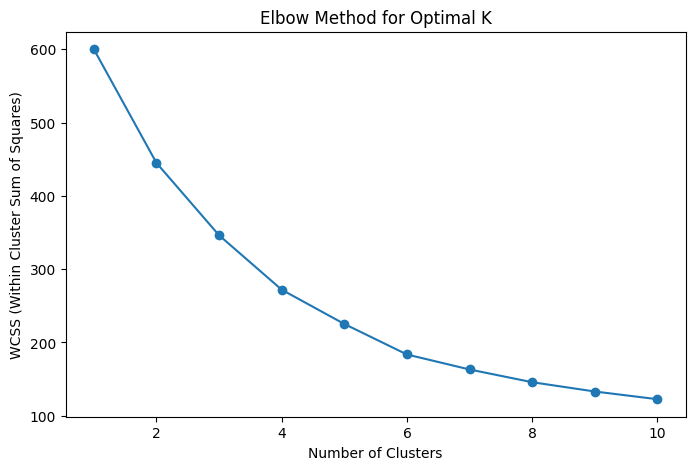

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [10]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

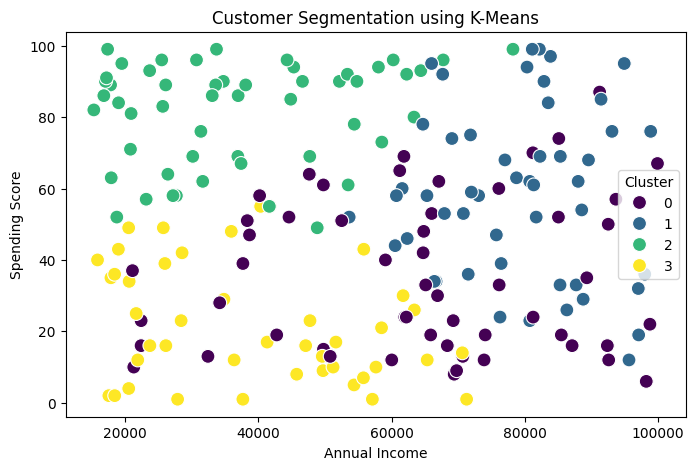

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["AnnualIncome"], y=df["SpendingScore"], hue=df["Cluster"], palette="viridis", s=100)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Means")
plt.legend(title="Cluster")
plt.show()
